<a href="https://colab.research.google.com/github/ananyadix/intern/blob/main/card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv("/content/fraudTrain.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.shape

(11706, 23)

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [ ]:
fraud = df[df['is_fraud'] == 1]
valid = df[df['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.004117697520802951


In [ ]:
print("Fraud cases:{}".format(len(fraud)))
print("Valid cases {}".format(len(valid)))

Fraud cases:48
Valid cases 11657


In [ ]:
print("Amount details of fraud transactions:")
fraud.amt.describe()

Amount details of fraud transactions:


count      48.000000
mean      543.499792
std       389.994963
min         4.500000
25%       276.165000
50%       537.395000
75%       851.087500
max      1254.270000
Name: amt, dtype: float64

In [ ]:
print("Amount details of valid transactions:")
valid.amt.describe()

Amount details of valid transactions:


count    11657.000000
mean        66.810468
std        106.599728
min          1.010000
25%          9.700000
50%         48.300000
75%         82.790000
max       3178.510000
Name: amt, dtype: float64

<ipython-input-10-2cc8fbe87efb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormet=df.corr()


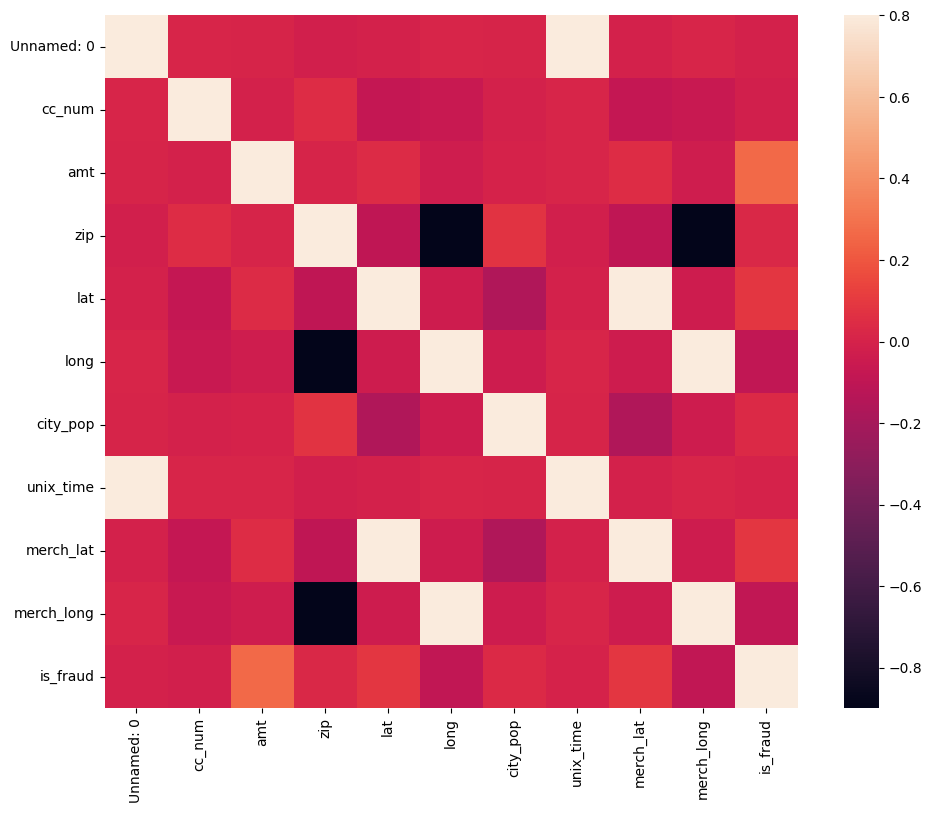

In [ ]:
cormet=df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormet, vmax = .8, square = True)
plt.show()

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null  float64
 15  ci

In [ ]:
df=df.drop(['trans_date_trans_time','merchant','category','first','last','gender','street','city','state','job','dob','trans_num'], axis=1)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

In [ ]:
df["zip"]=df["zip"].fillna(df["zip"].mean())
df["lat"]=df["lat"].fillna(df["lat"].mean())
df["long"]=df["long"].fillna(df["long"].mean())
df["city_pop"]=df["city_pop"].fillna(df["city_pop"].mean())
df["unix_time"]=df["unix_time"].fillna(df["unix_time"].mean())
df["merch_lat"]=df["merch_lat"].fillna(df["merch_lat"].mean())
df["merch_long"]=df["merch_long"].fillna(df["merch_long"].mean())
df["is_fraud"]=df["is_fraud"].fillna(df["is_fraud"].mean())

In [ ]:
df.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [ ]:
x = df.drop(['is_fraud'], axis = 1)
y = df["is_fraud"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous


In [ ]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, encoded)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

The accuracy is 0.9961571306575576


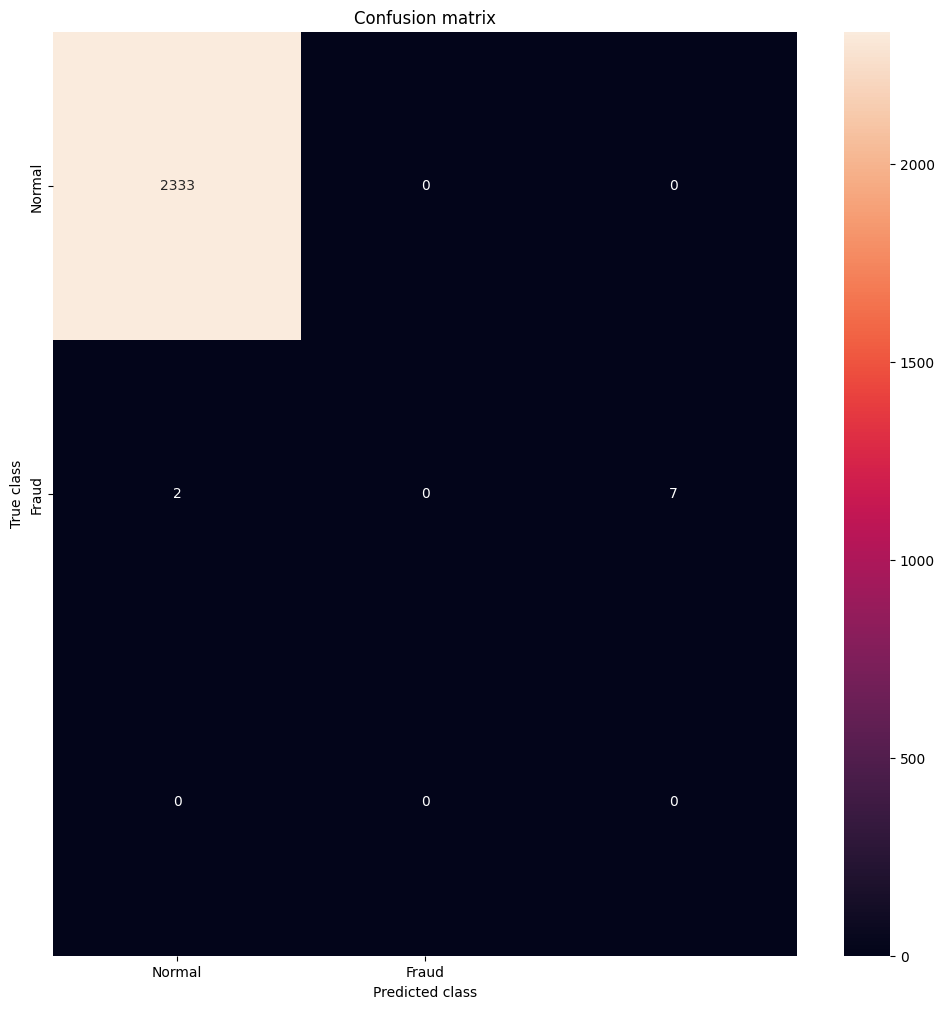

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()